In [ ]:
import os
import gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
env_name = 'Breakout-v0'
env = gym.make(env_name, render_mode='human')

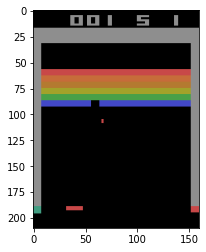

In [ ]:
env = gym.make(env_name)
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
env.action_space

Discrete(4)

In [ ]:
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
  obs = env.reset()
  done = False
  score = 0
  while not done:

    # To view render in collab, but is slow

    #screen = env.render(mode='rgb_array')
    #plt.imshow(screen)
    #ipythondisplay.clear_output(wait=True)
    #ipythondisplay.display(plt.gcf())

    # To render in collab

    #env.render()

    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score+=reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:3.0
Episode:2 Score:3.0
Episode:3 Score:2.0
Episode:4 Score:2.0
Episode:5 Score:1.0


In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
model = A2C('CnnPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=100000)

Logging to Training/Logs/A2C_1
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 176       |
|    ep_rew_mean        | 0         |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 100       |
|    time_elapsed       | 25        |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.39     |
|    explained_variance | -276      |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.000661 |
|    value_loss         | 2.92e-07  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 239      |
|    ep_rew_mean        | 1        |
| time/                 |          |
|    fps                | 20       |
|    iterations         | 200      |
|    time_elapsed       | 48       |
|    total_timesteps    | 1

In [ ]:
model.save("atari_model")